In [ ]:
# write a script that predicts stock price  for  the next 45 days

# Predicting stock prices accurately for the next 45 days can be challenging due to the inherent uncertainty and complexity of financial markets. However, we can create a basic script using historical data and a machine learning model to make predictions. For this example, I'll use the Facebook Prophet library, which is designed for time series forecasting tasks like stock price prediction.

# This script fetches historical stock data using Yahoo Finance, trains a Prophet model on this data, and then makes predictions for the next 45 days. The forecasted stock prices along with the upper and lower bounds of the prediction intervals are printed and visualized in a plot.

# Please note that this is a basic example, and stock price prediction is a complex field. The predictions may not always be accurate, and it's important to perform thorough analysis and consider other factors before making any financial decisions. Additionally, you might want to explore more advanced models, feature engineering, and parameter tuning for better predictions.


# https://facebook.github.io/prophet/docs/quick_start.html



In [11]:
pip install prophet yfinance ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.9 MB/s eta 0:00:0000:01
  Attempting uninstall: comm
    Found existing installation: comm 0.1.2
    Uninstalling comm-0.1.2:
      Successfully uninstalled comm-0.1.2
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
15:19:22 - cmdstanpy - INFO - Chain [1] start processing
15:19:22 - cmdstanpy - INFO - Chain [1] done processing


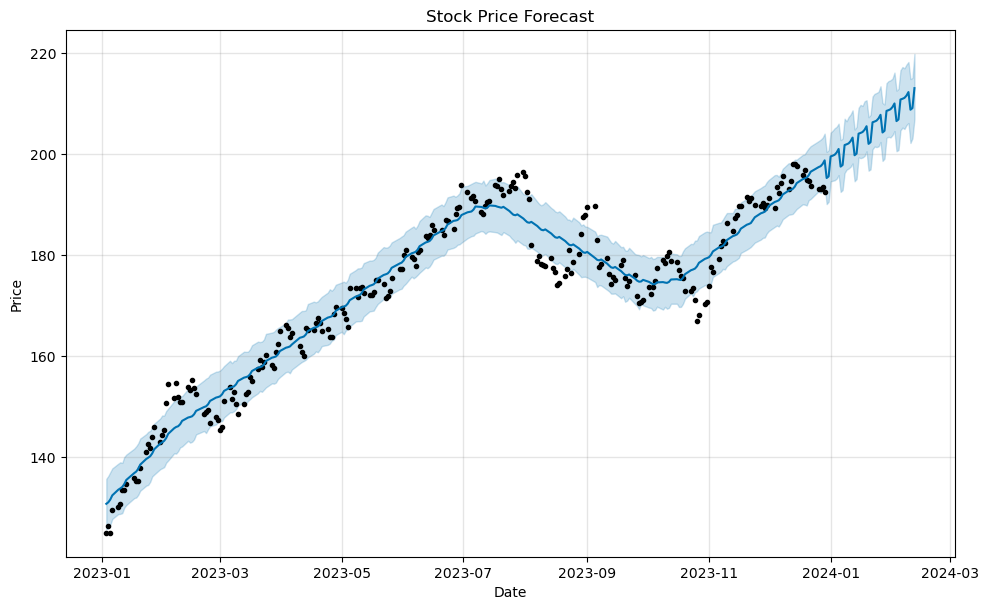

            ds        yhat  yhat_lower  yhat_upper
250 2023-12-30  195.278069  190.109004  200.433913
251 2023-12-31  195.600098  190.573265  200.790638
252 2024-01-01  199.552701  194.607317  204.263760
253 2024-01-02  199.696351  194.729098  204.639866
254 2024-01-03  199.878785  194.826925  205.121623
255 2024-01-04  200.316415  195.140184  205.408313
256 2024-01-05  201.028756  195.845943  206.044391
257 2024-01-06  197.532281  192.516908  202.777710
258 2024-01-07  197.854310  192.885155  203.106958
259 2024-01-08  201.806913  196.271659  207.023882
260 2024-01-09  201.950563  196.925152  206.518697
261 2024-01-10  202.132997  197.157985  207.367371
262 2024-01-11  202.570627  197.509905  207.845469
263 2024-01-12  203.282968  198.154902  208.674464
264 2024-01-13  199.786493  194.633421  204.884069
265 2024-01-14  200.108522  195.061765  205.376258
266 2024-01-15  204.061125  199.355003  209.172106
267 2024-01-16  204.204775  199.212111  209.765315
268 2024-01-17  204.387209  199

In [12]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def predict_stock_price(data, days):
    df = pd.DataFrame({'ds': data.index, 'y': data['Close']})
    
    # Create and fit the model
    model = Prophet()
    model.fit(df)
    
    # Make future predictions
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast)
    plt.title("Stock Price Forecast")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-days:]

# Example usage
if __name__ == "__main__":
    ticker = "AAPL"  # Replace with the desired stock symbol
    start_date = "2023-01-01"
    end_date = "2024-01-01"
    days_to_predict = 45

    # Get historical stock data
    stock_data = get_stock_data(ticker, start_date, end_date)

    # Predict stock prices for the next 45 days
    predictions = predict_stock_price(stock_data, days_to_predict)

    print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
